In [2]:
%matplotlib inline

# load the digits data
from sklearn import datasets

digits = datasets.load_digits()

In [14]:
# show image pixels as an array
print "Each image is an 8x8 array of pixels:"
print digits.images[0]

Each image is an 8x8 array of pixels:
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1]


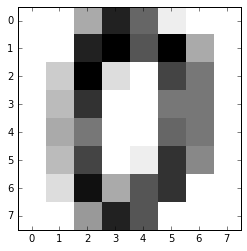

In [4]:
# plot an image
import pylab as pl

pl.imshow(digits.images[0], cmap=pl.cm.gray_r, interpolation='nearest')

In [5]:
# display the label (as a scalar) and features (as a vector)
print "This image has been labeled as a:" , digits.target[0]
print "Its 64 features (pixel values) are:"
print digits.data[0]

This image has been labeled as a: 0
Its 64 features (pixel values) are:
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


In [11]:
# evaluate a k-nearest neighbor model with different number of neighbors
from sklearn import neighbors
import numpy as np

# split the data into 80% for training, 10% for validation, and 10% for testing
# note: see train_test_split in sklearn.model_selection for pre-packaged function to do this
num_train = int(digits.target.size * 0.8)
num_validate = int(digits.target.size * 0.1)
train_data, train_target = digits.data[:num_train], digits.target[:num_train]
validate_data, validate_target = digits.data[num_train:(num_train+num_validate)], digits.target[num_train:(num_train+num_validate)]
test_data, test_target = digits.data[(num_train+num_validate):], digits.target[(num_train+num_validate):]

# fit for k=1 to k=7
num_neighbors = range(1,8)
accuracy = []
error = []
train_accuracy = []
for k in num_neighbors:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # fit on the training data
    knn.fit(train_data, train_target)
    
    # evaluate on the validation data
    acc = knn.score(validate_data, validate_target)
    err = 1 - acc
    print "With k = %d neighbors, our accuracy is %.2f%% (error of %.2f%%)" % (k, acc*100, err*100)

    accuracy.append(acc)
    error.append(err)
    
    # evaluate on the training data for comparison
    terr = knn.score(train_data, train_target)
    train_accuracy.append(1-terr)
    
print train_accuracy

With k = 1 neighbors, our accuracy is 96.09% (error of 3.91%)
With k = 2 neighbors, our accuracy is 97.21% (error of 2.79%)
With k = 3 neighbors, our accuracy is 97.21% (error of 2.79%)
With k = 4 neighbors, our accuracy is 97.21% (error of 2.79%)
With k = 5 neighbors, our accuracy is 96.65% (error of 3.35%)
With k = 6 neighbors, our accuracy is 94.97% (error of 5.03%)
With k = 7 neighbors, our accuracy is 94.41% (error of 5.59%)
[0.0, 0.0090466249130132237, 0.0062630480167014113, 0.0076548364648573175, 0.0090466249130132237, 0.0090466249130132237, 0.0097425191370911213]


(0, 8)

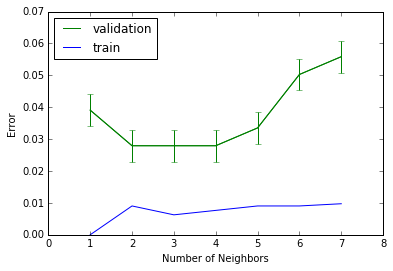

In [12]:
# plot the generalization error with increasing number of neighbors
import matplotlib.pyplot as plt

plt.plot(num_neighbors, error, '-g', label='validation')
plt.plot(num_neighbors, train_accuracy, '-b', label='train')
plt.errorbar(num_neighbors, error, yerr=0.005, color='g')
plt.legend(loc='upper left')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
axes = plt.gca()
axes.set_xlim([0,8])


In [13]:
# evaluate the model with best generalization error on the test set
from sklearn.metrics import confusion_matrix, classification_report

# find the best value of k
k = num_neighbors[np.argmax(accuracy)]

# refit the model on all of the training and validation data
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(digits.data[:(num_train+num_validate)], digits.target[:(num_train+num_validate)])

predicted = knn.predict(test_data)

print classification_report(test_target, predicted)

confmat = confusion_matrix(test_target, predicted)
print confmat

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.95      1.00      0.97        19
          2       1.00      1.00      1.00        17
          3       0.94      0.94      0.94        18
          4       1.00      1.00      1.00        20
          5       0.90      1.00      0.95        18
          6       1.00      1.00      1.00        18
          7       1.00      1.00      1.00        19
          8       1.00      0.94      0.97        17
          9       1.00      0.89      0.94        19

avg / total       0.98      0.98      0.98       181

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  1  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0]
 [ 0  1  0  0  0  0  0  0 16  0]
 [ 0  0  0  1  0  1  0  0  0 17]]
